In [11]:
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

candles csv from:

(a) https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/ccxt_candles_ta_to_csv.py

(b) https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/futu_candles_ta_to_csv.py

In [31]:
MAX_NUM_DAYS : int = 7
candles = pd.read_csv('candles_ta_BTC.csv')
candles['datetime'] = pd.to_datetime(candles['datetime'])
candles = candles.iloc[-MAX_NUM_DAYS*24:] # Trailing MAX_NUM_DAYS days
candles

,Unnamed: 0,exchange,symbol,timestamp_ms,open,high,low,close,volume,datetime,...,normalized_hurst_exp_slope,normalized_hurst_exp_slope_min,normalized_hurst_exp_slope_max,normalized_hurst_exp_slope_idmin,normalized_hurst_exp_slope_idmax,fib_0.618_short_periods,fib_0.618_long_periods,gap_close_vs_ema,close_above_or_below_ema,close_vs_ema_inflection
22619,22619,OKX,BTC/USDT:USDT,1753930800000,118424.4,118600.0,118345.2,118460.4,1444.6363,2025-07-31 11:00:00,...,0.736578,-0.276880,1.0,22495.0,22549.0,117653.3538,117867.0992,581.328947,above,NaN
22620,22620,OKX,BTC/USDT:USDT,1753934400000,118460.7,118551.1,118335.0,118502.5,1098.3199,2025-07-31 12:00:00,...,0.693735,-0.266078,1.0,22496.0,22549.0,117759.9112,117867.0992,573.554631,above,NaN
22621,22621,OKX,BTC/USDT:USDT,1753938000000,118502.6,118535.6,118309.3,118350.0,1067.5455,2025-07-31 13:00:00,...,0.652143,-0.265384,1.0,22497.0,22549.0,117852.4876,117867.0992,387.370261,above,NaN
22622,22622,OKX,BTC/USDT:USDT,1753941600000,118349.9,118731.0,118244.9,118682.6,1430.0655,2025-07-31 14:00:00,...,0.601918,-0.256829,1.0,22498.0,22549.0,118133.9396,117867.0992,662.372640,above,NaN
22623,22623,OKX,BTC/USDT:USDT,1753945200000,118682.7,118929.1,118582.4,118674.5,2487.3076,2025-07-31 15:00:00,...,0.549981,-0.226736,1.0,22499.0,22549.0,118285.7822,117867.0992,601.930829,above,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,22782,OKX,BTC/USDT:USDT,1754517600000,115000.0,115160.0,114986.5,115035.7,942.8530,2025-08-07 06:00:00,...,-0.296176,-0.421581,1.0,22658.0,22731.0,115280.7334,114175.1272,439.593391,above,NaN
22783,22783,OKX,BTC/USDT:USDT,1754521200000,115035.8,115060.0,114924.2,114944.0,548.0757,2025-08-07 07:00:00,...,-0.328959,-0.402921,1.0,22659.0,22731.0,115266.9050,114175.1272,320.061920,above,NaN
22784,22784,OKX,BTC/USDT:USDT,1754524800000,114944.1,114976.2,114807.1,114855.8,771.8170,2025-08-07 08:00:00,...,-0.357980,-0.386740,1.0,22660.0,22731.0,115233.2126,114175.1272,213.312966,above,NaN
22785,22785,OKX,BTC/USDT:USDT,1754528400000,114855.8,115150.0,114538.0,114704.1,1655.3952,2025-08-07 09:00:00,...,-0.390132,-0.390132,1.0,22785.0,22731.0,115121.8062,114175.1272,56.683929,above,1.0


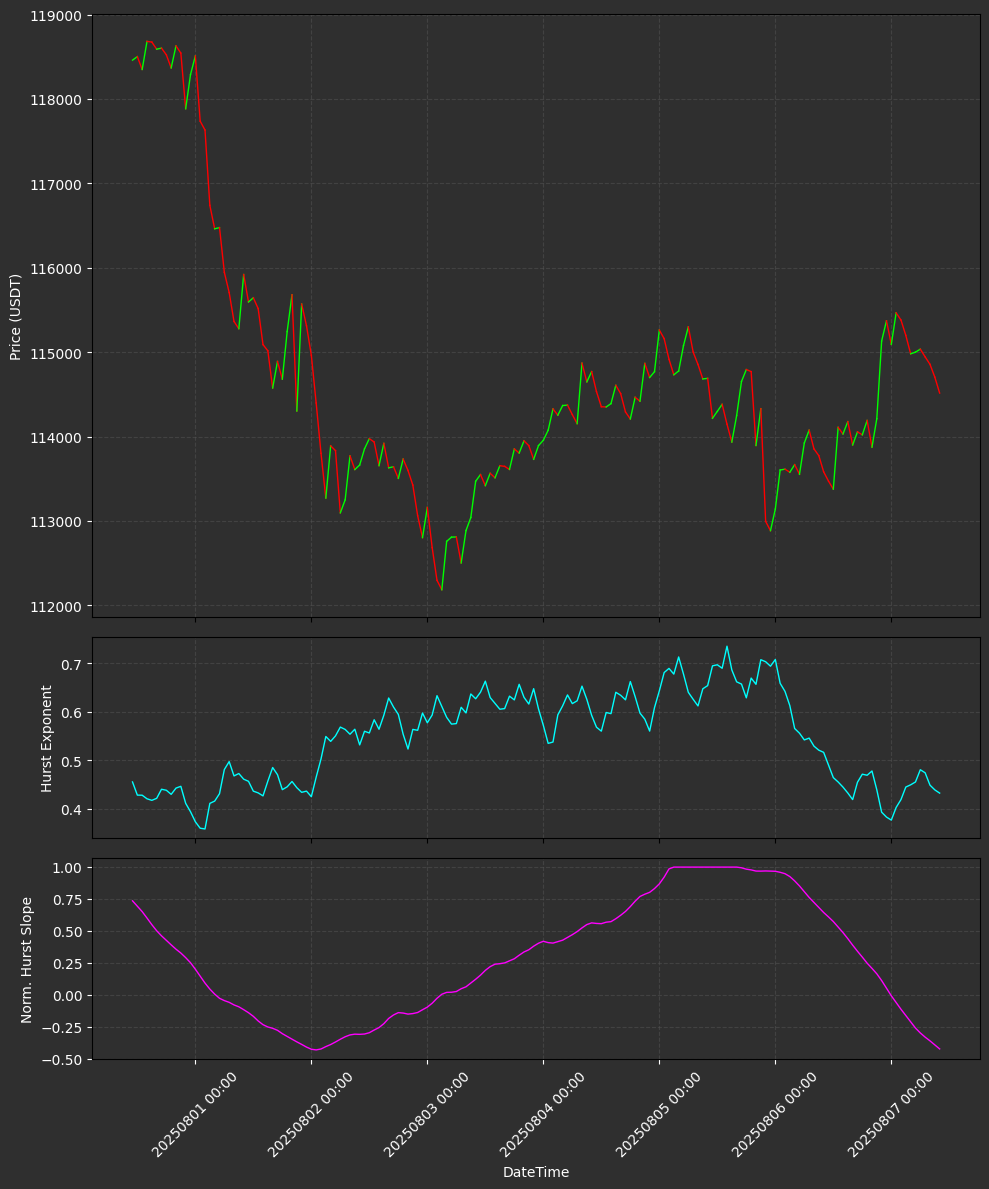

In [32]:
candles['color'] = ['#00FF00'] + ['#00FF00' if candles['close'].iloc[i] >= candles['close'].iloc[i-1] else '#FF0000' for i in range(1, len(candles))]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), facecolor='#2F2F2F', sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

ax1.set_facecolor('#2F2F2F')
for i in range(1, len(candles)):
    ax1.plot(candles['datetime'].iloc[i-1:i+1], candles['close'].iloc[i-1:i+1], color=candles['color'].iloc[i], linewidth=1)
ax1.set_ylabel('Price (USDT)', color='#FFFFFF')
ax1.tick_params(axis='y', colors='#FFFFFF')
ax1.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax2.set_facecolor('#2F2F2F')
ax2.plot(candles['datetime'], candles['hurst_exp'], color='#00FFFF', linewidth=1)
ax2.set_ylabel('Hurst Exponent', color='#FFFFFF')
ax2.tick_params(axis='y', colors='#FFFFFF')
ax2.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax3.set_facecolor('#2F2F2F')
ax3.plot(candles['datetime'], candles['normalized_hurst_exp_slope'], color='#FF00FF', linewidth=1)
ax3.set_ylabel('Norm. Hurst Slope', color='#FFFFFF')
ax3.tick_params(axis='y', colors='#FFFFFF')
ax3.set_xlabel('DateTime', color='#FFFFFF')
ax3.tick_params(axis='x', colors='#FFFFFF', rotation=45)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d %H:%M'))
ax3.grid(True, color='#555555', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()